In [24]:
from scipy.optimize import fsolve
#n-octane Peng-Robinson equation
def specificvolPR(v,p):
    # for n-octane
    Tc=568.8 #K
    pc=24.5  #atm
    T=600    #K
    R=0.08206 #l/gmol
    acentric=0.397
    mPR=0.37363+(1.54226-0.26992*acentric)*acentric
    alphaPR=(1 + mPR* (1-(T/Tc)**0.5))**2
    aPR=0.45724*alphaPR*(R*Tc)**2/pc
    bPR=0.07780*(R*Tc/pc)
    return p*v**3+(bPR*p-R*T)*v**2+(aPR-p*bPR**2-R*T*bPR)*v+(p*bPR**3+R*T*bPR**2-aPR*bPR)

In [25]:
print(specificvolPR(2,4))

-104.75179577815825


In [29]:
v=fsolve(specificvolPR,(2,4))
print(v,p)

TypeError: specificvolPR() missing 1 required positional argument: 'p'

In [35]:
from scipy.optimize import fsolve
#specific volume of n-octane using Redlich-kwong equation of state
def specificvol(v):
    # for n-octane
    Tc=568.8 #K
    pc=24.5  #atm
    T=600    #K
    p=20     #atm
    R=0.08206 #l/gmol
    aRK=0.42748*(R*Tc)**2/pc
    aRK=aRK*(Tc/T)**0.5
    bRK=0.08664*(R*Tc/pc)
    return p*v**3-R*T*v**2+(aRK-p*bRK**2-R*T*bRK)*v-aRK*bRK

In [33]:
print(specificvol(2))

13.626115914387217


In [34]:
v=fsolve(specificvol,2)
print(v)

[1.75281907]


In [39]:
#python code to compute the compressibility factor for a number of pressure values.
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

#n-octane Redlich kwong equation
def specificvolRK(v,p):
    # for n-octane
    Tc=568.8 #K
    pc=24.5  #atm
    T=600    #K
    R=0.08206 #l/gmol
    aRK=0.42748*(R*Tc)**2/pc
    aRK=aRK*(Tc/T)**0.5
    bRK=0.08664*(R*Tc/pc)
    return p*v**3-R*T*v**2+(aRK-p*bRK**2-R*T*bRK)*v-aRK*bRK

In [47]:
T=600
R=0.08206
pressure=np.arange(1,27,5)
print(pressure)
print(pressure[0])
print(pressure[5])
zcompRK=np.zeros(6,dtype=float)
zcompRKS=np.zeros(6,dtype=float)
zcompPR=np.zeros(6,dtype=float)
print(zcompRK)

[ 1  6 11 16 21 26]
1
26
[0. 0. 0. 0. 0. 0.]


In [50]:
for i in range (0,6,1):
    p=pressure[i]
    guess=R*T/p
    y=fsolve(specificvolRK,guess,p)
    z=p*v/(R*T)
    zcompRK[i]=z

[0.03560035 0.21360213 0.3916039  0.56960568 0.74760745 0.92560923]


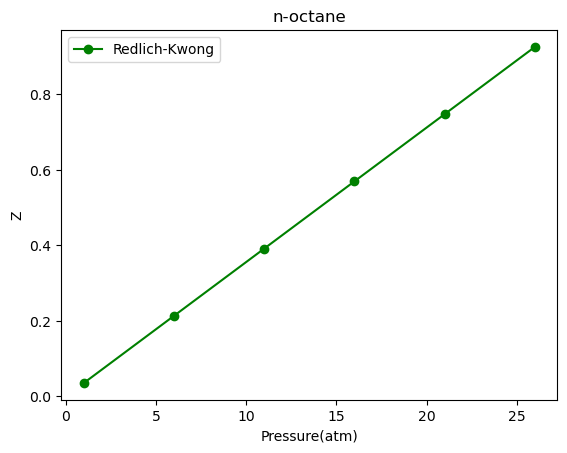

In [51]:
print(zcompRK)
plt.plot(pressure,zcompRK,'o-g',label='Redlich-Kwong')
plt.legend(loc='best')
plt.xlabel('Pressure(atm)')
plt.ylabel('Z')
plt.title('n-octane')
plt.show()